# Lecture 1

In [4]:
from scipy.stats import binom

# Define the variables from the problem
n = 31000  # Total number of individuals
k = 63     # Number of successes (deaths)
p = 0.00203  # Probability of success for a single individual

# Calculate the binomial probability using the binom.pmf function
probability = binom.pmf(k, n, p)

# Print the result, formatted to at least 4 decimal places
print(f"The probability of exactly 63 deaths is: {probability:.8f}")


The probability of exactly 63 deaths is: 0.05024469


In [ ]:
import scipy
binom.ppf(0.05, 31000, 0.00203)

np.float64(50.0)

In [12]:
from scipy.stats import fisher_exact
import numpy as np

table = np.array([[39,63],[30961,30937]])
print(fisher_exact(table, alternative='less').pvalue)

0.011094091841433758


In [9]:
from scipy.stats import fisher_exact

table = [[39, 63], [30961, 30937]]
odds_ratio, p_value = fisher_exact(table, alternative='less')

print(f"The p-value is: {p_value:.8f}")

The p-value is: 0.01109409


# Lecture 2

In [16]:
from scipy.stats import norm
from math import sqrt

X_bar = 39/31000
pi = 63/31000
std = sqrt(pi*(1-pi))
n = 31000

z = (X_bar - pi) /(std/sqrt(n))
print(f'Valor de Z es : {z}')

p_value = norm.cdf(z)

print(f'p_value is: {p_value}')


Valor de Z es : -3.0267929604748476
p_value is: 0.0012358159238705215


In [ ]:
import numpy as np
from scipy.stats import t


drug_sleep = np.array([6.1, 7.0, 8.2, 7.6, 6.5, 7.8, 6.9, 6.7, 7.4, 5.8])
placebo_sleep = np.array([5.2, 7.9, 3.9, 4.7, 5.3, 4.8, 4.2, 6.1, 3.8, 6.3])

X_values = drug_sleep-placebo_sleep
n = len(X_values)

var = np.var(X_values)
unbiased_var = var*n/(n-1)
unbiased_stf = sqrt(unbiased_var)

X_bar = np.mean(X_values)

t_value = X_bar/(unbiased_stf/sqrt(n))

p_value = 1-t.cdf(t_value, n-1) # n-1 grados de libertad

print(f'p_value is: {p_value:6f}')


p_value is: 0.005561
0.005560692749284672


In [43]:
from scipy.stats import binom
from math import log

n_death_treatment = 39
n_death_control = 63
n_death_total = n_death_treatment + n_death_control

n_exp_treatment = 31000
n_exp_control = 31000
n_exp_total = 62000

pi_treatment = n_death_treatment/n_exp_treatment
pi_control = n_death_control/n_exp_control
pi_total = n_death_total / n_exp_total


print(f'pi_0 MLE en H0 = {pi_total:.4f}')

print(f'pi_treatmant MLE en HA para treatment = {pi_treatment:.4f}')
print(f'pi_control MLE en HA para control = {pi_control:.4f}')


## Value for test_statistct A

numerador = binom.pmf(n_death_treatment, n_exp_treatment, pi_total) * binom.pmf(n_death_control, n_exp_control, pi_total)
denominador = binom.pmf(n_death_treatment, n_exp_treatment, pi_treatment) * binom.pmf(n_death_control, n_exp_control, pi_control)

test_statistic_A = -2*log(numerador/denominador)

print(f'Valor para test statistic = {test_statistic_A:.4f}')

pi_0 MLE en H0 = 0.0016
pi_treatmant MLE en HA para treatment = 0.0013
pi_control MLE en HA para control = 0.0020
Valor para test statistic = 5.7097


In [ ]:
## Find p-value
from scipy.stats import chi2
n_degrees = 1

p_value = 1-chi2.cdf(test_statistic_A, n_degrees)

print(f'p value = {p_value:.4f}')

p value = 0.0169


# Lecture 4

### Problem 1: Linearity

In [1]:
import numpy as np

Xs = np.array([0.0339, 0.0423, 0.213, 0.257, 0.273, 0.273, 0.450, 0.503, 0.503, \
0.637, 0.805, 0.904, 0.904, 0.910, 0.910, 1.02, 1.11, 1.11, 1.41, \
1.72, 2.03, 2.02, 2.02, 2.02])

Ys = np.array([-19.3, 30.4, 38.7, 5.52, -33.1, -77.3, 398.0, 406.0, 436.0, 320.0, 373.0, \
93.9, 210.0, 423.0, 594.0, 829.0, 718.0, 561.0, 608.0, 1.04E3, 1.10E3, \
840.0, 801.0, 519.0])

N = 24

In [10]:
print(f'X mean: {np.mean(Xs):.3f}')
print(f'Y mean: {np.mean(Ys):.3f}')
print('--------')
print(f'X std: {np.std(Xs, ddof=1):.3f}')
print(f'Y std: {np.std(Ys, ddof=1):.3f}')
print('--------')
print(f'Covariance: {np.cov(Xs, Ys, ddof=1)[0,1]:.3f}')

#print(np.cov(Xs, Ys, ddof=1))


X mean: 0.920
Y mean: 425.618
--------
X std: 0.653
Y std: 348.734
--------
Covariance: 191.207


In [ ]:
r_xy = np.corrcoef(Xs, Ys, ddof=1)
print(f'r_xy = {r_xy[0,1]:.3f}')

r_xy = 0.839


C:\Users\user\AppData\Local\Temp\ipykernel_22612\1997499069.py:4: DeprecationWarning: bias and ddof have no effect and are deprecated
  r_xy = np.corrcoef(Xs, Ys, ddof=1)


In [40]:
from sklearn.linear_model import LinearRegression

#TRANSFORMA EL 1D en 2D
x_train = Xs.reshape(-1,1)
y_train = Ys.reshape(-1,1)

lr = LinearRegression()
lr.fit(x_train, y_train)
print(lr.coef_)
print(lr.intercept_)

lr2 = LinearRegression()
lr2.fit(y_train, x_train)
print(lr2.coef_)
print(lr2.intercept_)

[[447.87059914]]
[13.61013909]
[[0.00157223]]
[0.2507562]


In [41]:
1/447.87059914

0.002232787778256035

### Problem 2: Non Linearity

In [2]:
import numpy as np
    
Xs = np.array([ 0.387, 0.723, 1.00, 1.52, 5.20, 9.54, 19.2, 30.1, 39.5 ])

Ys = np.array([ 0.241, 0.615, 1.00, 1.88, 11.9, 29.5, 84.0, 165.0, 248 ])

N = 9

In [43]:
r_xy = np.corrcoef(Xs, Ys, ddof=1)
print(f'r_xy = {r_xy[0,1]:.3f}')

r_xy = 0.989


C:\Users\user\AppData\Local\Temp\ipykernel_22612\2062774017.py:1: DeprecationWarning: bias and ddof have no effect and are deprecated
  r_xy = np.corrcoef(Xs, Ys, ddof=1)


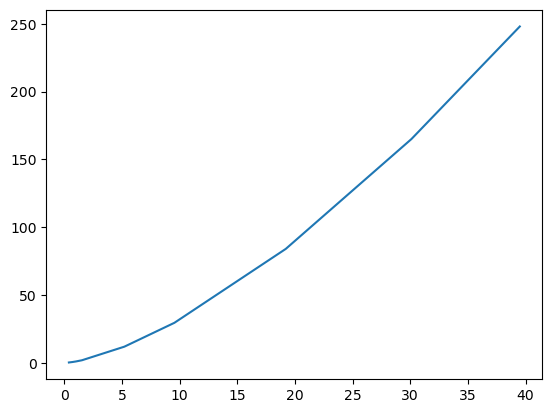

In [5]:
import matplotlib.pyplot as plt
plt.plot(Xs, Ys)

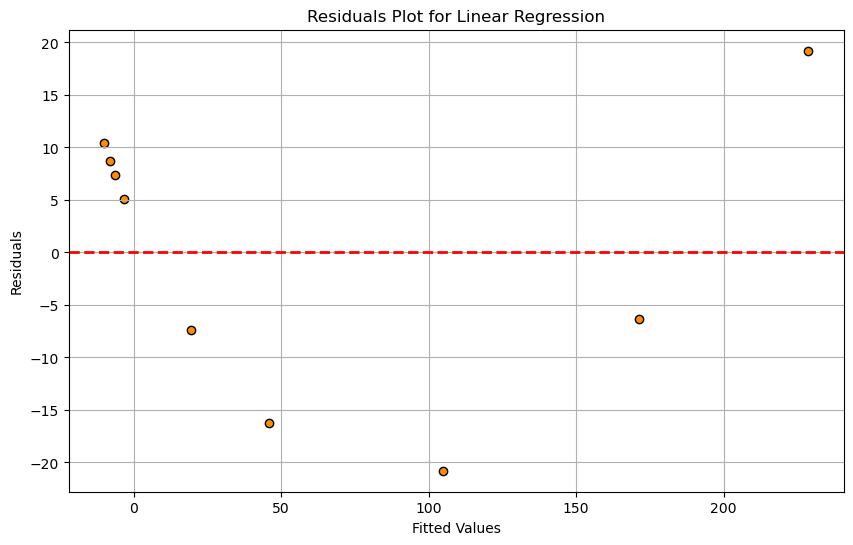

In [16]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LinearRegression

# Reshape Xs to a 2D array for scikit-learn
Xs_reshaped = Xs.reshape(-1, 1)

# Perform linear regression
lr = LinearRegression()
lr.fit(Xs_reshaped, Ys)

# Get the predicted Y values and calculate the residuals
Y_pred = lr.predict(Xs_reshaped)
residuals = Ys - Y_pred

# Create a DataFrame for easy plotting and analysis
df_residuals = pd.DataFrame({'Fitted Values': Y_pred, 'Residuals': residuals, 'X Values': Xs})

# Plotting the residuals against the fitted values
plt.figure(figsize=(10, 6))
plt.scatter(df_residuals['Fitted Values'], df_residuals['Residuals'], color='darkorange', edgecolors='black')
plt.axhline(y=0, color='red', linestyle='--', linewidth=2)
plt.title('Residuals Plot for Linear Regression')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.grid(True)
plt.show()

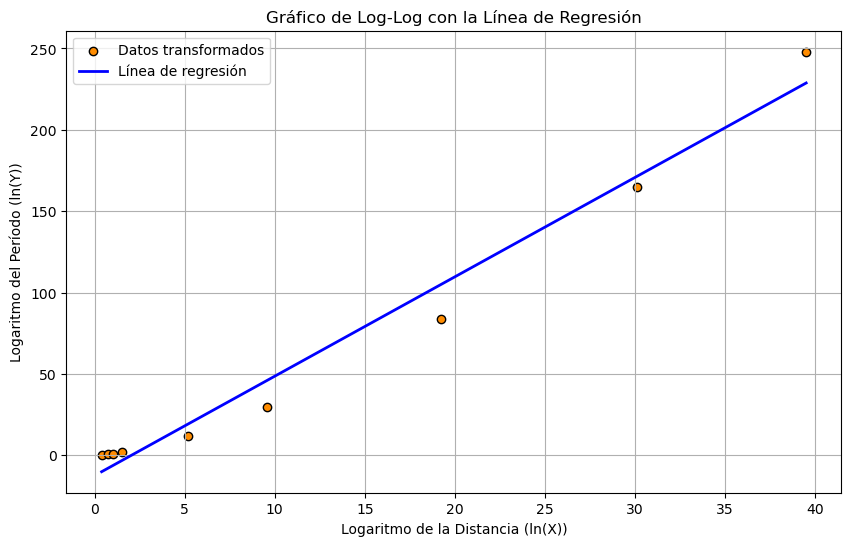

In [18]:
# Plot the transformed data with the best-fit linear regression line
plt.figure(figsize=(10, 6))
plt.scatter(Xs, Ys, color='darkorange', edgecolors='black', label='Datos transformados')
plt.plot(Xs, Y_pred, color='blue', linewidth=2, label='Línea de regresión')
plt.title('Gráfico de Log-Log con la Línea de Regresión')
plt.xlabel('Logaritmo de la Distancia (ln(X))')
plt.ylabel('Logaritmo del Período (ln(Y))')
plt.legend()
plt.grid(True)
plt.show()

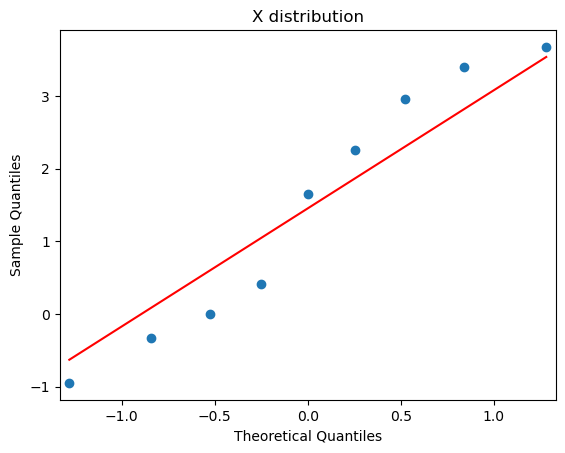

In [ ]:
import statsmodels.api as sm
sm.qqplot(Xs, line='s')
plt.title("X distribution")
plt.show()

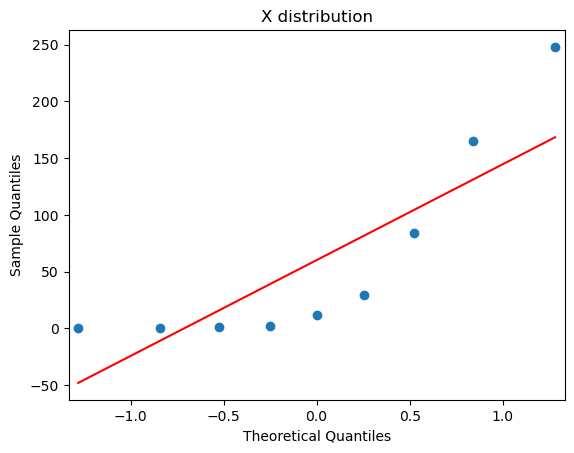

In [10]:
import statsmodels.api as sm
sm.qqplot(Ys, line='s')
plt.title("X distribution")
plt.show()

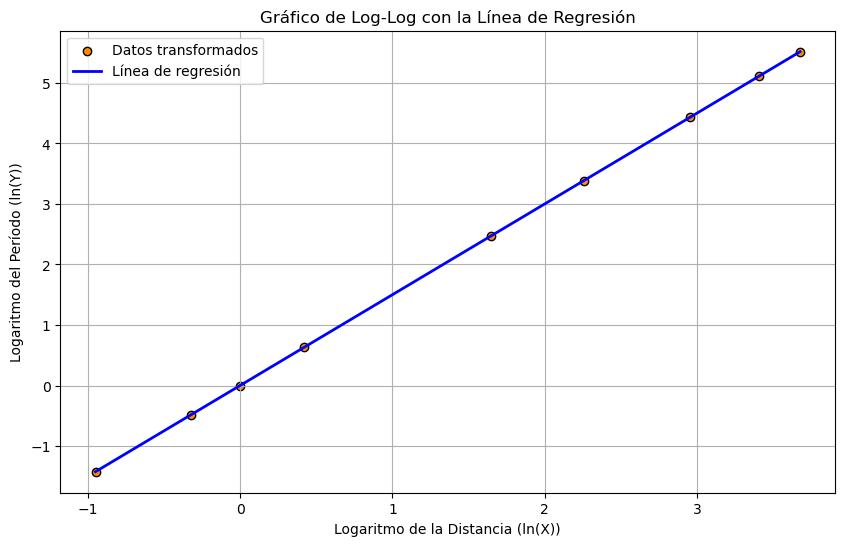

In [19]:
# Perform the log-log transformation
ln_Xs = np.log(Xs)
ln_Ys = np.log(Ys)

# Reshape for scikit-learn and fit a new linear model
ln_Xs_reshaped = ln_Xs.reshape(-1, 1)
lr_log = LinearRegression()
lr_log.fit(ln_Xs_reshaped, ln_Ys)

# Get the predicted values from the new model
ln_Y_pred = lr_log.predict(ln_Xs_reshaped)

# Plot the transformed data with the best-fit linear regression line
plt.figure(figsize=(10, 6))
plt.scatter(ln_Xs, ln_Ys, color='darkorange', edgecolors='black', label='Datos transformados')
plt.plot(ln_Xs, ln_Y_pred, color='blue', linewidth=2, label='Línea de regresión')
plt.title('Gráfico de Log-Log con la Línea de Regresión')
plt.xlabel('Logaritmo de la Distancia (ln(X))')
plt.ylabel('Logaritmo del Período (ln(Y))')
plt.legend()
plt.grid(True)
plt.show()

In [24]:
print(f'coef: {lr_log.coef_[0]:.2f}')

coef: 1.50


### Problem 3: Multi ones 

In [25]:

LogPlanetMass = np.array([-0.31471074,  1.01160091,  0.58778666,  0.46373402, -0.01005034,
         0.66577598, -1.30933332, -0.37106368, -0.40047757, -0.27443685,
         1.30833282, -0.46840491, -1.91054301,  0.16551444,  0.78845736,
        -2.43041846,  0.21511138,  2.29253476, -2.05330607, -0.43078292,
        -4.98204784, -0.48776035, -1.69298258, -0.08664781, -2.28278247,
         3.30431931, -3.27016912,  1.14644962, -3.10109279, -0.61248928])

LogPlanetRadius = np.array([ 0.32497786,  0.34712953,  0.14842001,  0.45742485,  0.1889661 ,
         0.06952606,  0.07696104,  0.3220835 ,  0.42918163, -0.05762911,
         0.40546511,  0.19227189, -0.16251893,  0.45107562,  0.3825376 ,
        -0.82098055,  0.10436002,  0.0295588 , -1.17921515,  0.55961579,
        -2.49253568,  0.11243543, -0.72037861,  0.36464311, -0.46203546,
         0.13976194, -2.70306266,  0.12221763, -2.41374014,  0.35627486])

LogPlanetOrbit = np.array([-2.63108916, -3.89026151, -3.13752628, -2.99633245, -3.12356565,
        -2.33924908, -2.8507665 , -3.04765735, -2.84043939, -3.19004544,
        -3.14655516, -3.13729584, -3.09887303, -3.09004295, -3.16296819,
        -2.3227878 , -3.77661837, -2.52572864, -4.13641734, -3.05018846,
        -2.40141145, -3.14795149, -0.40361682, -3.2148838 , -2.74575207,
        -3.70014265, -1.98923527, -3.35440922, -1.96897409, -2.99773428])

StarMetallicity = np.array([ 0.11 , -0.002, -0.4  ,  0.01 ,  0.15 ,  0.22 , -0.01 ,  0.02 ,
        -0.06 , -0.127,  0.   ,  0.12 ,  0.27 ,  0.09 , -0.077,  0.3  ,
         0.14 , -0.07 ,  0.19 , -0.02 ,  0.12 ,  0.251,  0.07 ,  0.16 ,
         0.19 ,  0.052, -0.32 ,  0.258,  0.02 , -0.17 ])

LogStarMass = np.array([ 0.27002714,  0.19144646, -0.16369609,  0.44468582,  0.19227189,
         0.01291623,  0.0861777 ,  0.1380213 ,  0.49469624, -0.43850496,
         0.54232429,  0.02469261,  0.07325046,  0.42133846,  0.2592826 ,
        -0.09431068, -0.24846136, -0.12783337, -0.07364654,  0.26159474,
         0.07603469, -0.07796154,  0.09440068,  0.07510747,  0.17395331,
         0.28893129, -0.21940057,  0.02566775, -0.09211529,  0.16551444])

LogStarAge = np.array([ 1.58103844,  1.06471074,  2.39789527,  0.72754861,  0.55675456,
         1.91692261,  1.64865863,  1.38629436,  0.77472717,  1.36097655,
         0.        ,  1.80828877,  1.7837273 ,  0.64185389,  0.69813472,
         2.39789527, -0.35667494,  1.79175947,  1.90210753,  1.39624469,
         1.84054963,  2.19722458,  1.89761986,  1.84054963,  0.74193734,
         0.55961579,  1.79175947,  0.91629073,  2.17475172,  1.36097655])

N = 30

In [32]:
from sklearn.linear_model import LinearRegression

y = LogPlanetMass
x = np.column_stack([LogPlanetRadius, 
     LogPlanetOrbit,
     StarMetallicity,
     LogStarMass,
     LogStarAge])

log_model = LinearRegression()
log_model.fit(x, y)

# Coeficientes y resultados
print("Intercepto:", np.round(log_model.intercept_,3))
print("Coeficientes:", np.round(log_model.coef_, 3))

print("R^2:", log_model.score(x, y))


Intercepto: 0.154
Coeficientes: [ 1.402 -0.141 -1.6   -0.956 -0.462]
R^2: 0.6586989465806861


In [33]:
predictor_names = ['Intercept', 'LogPlanetRadius', 'LogPlanetOrbit', 'StarMetallicity', 'LogStarMass', 'LogStarAge']

# 1. Construir la matriz de diseño X
# Agregar una columna de unos para el término de intercepción (beta_0)
X_data = np.vstack([np.ones(N), LogPlanetRadius, LogPlanetOrbit, StarMetallicity, LogStarMass, LogStarAge]).T
y = LogPlanetMass.reshape(-1, 1)

# 2. Calcular los coeficientes del modelo de regresión (beta_hat)
# Formula: beta_hat = (X^T * X)^-1 * X^T * y
XTX = X_data.T @ X_data
XTX_inv = np.linalg.inv(XTX)
XTy = X_data.T @ y
beta_hat = XTX_inv @ XTy
p = beta_hat.shape[0]

# 3. Calcular la varianza del error estimada (sigma_hat^2)
# Formula: sigma_hat^2 = ||y - X * beta_hat||^2 / (N-p)
y_pred = X_data @ beta_hat
residuals = y - y_pred
squared_residuals_sum = np.sum(residuals**2)
sigma_hat_squared = squared_residuals_sum / (N - p)
sigma_hat = np.sqrt(sigma_hat_squared)

# 4. Obtener las varianzas de los coeficientes del modelo
# Son los elementos diagonales de la matriz (X^T * X)^-1
diag_elements_XTX_inv = np.diag(XTX_inv)

# 5. Calcular los valores T_j para cada coeficiente
# Formula: T_j = beta_hat_j / (sigma_hat * sqrt(diag_element_j))
t_values = beta_hat.flatten() / (sigma_hat * np.sqrt(diag_elements_XTX_inv))

# Imprimir los resultados
print("Coeficientes de regresión (beta_hat):")
for name, beta in zip(predictor_names, beta_hat.flatten()):
    print(f"  {name}: {beta:.4f}")

print("\nValores T_j para cada predictor:")
for name, t_val in zip(predictor_names, t_values):
    print(f"  T_{name}: {t_val:.4f}")

# 6. Encontrar el predictor más significativo
most_significant_idx = np.argmax(np.abs(t_values))
most_significant_predictor = predictor_names[most_significant_idx]
max_t_value = t_values[most_significant_idx]

print(f"\nEl predictor más significativo es: {most_significant_predictor} con un valor T de {max_t_value:.4f}")


Coeficientes de regresión (beta_hat):
  Intercept: 0.1538
  LogPlanetRadius: 1.4021
  LogPlanetOrbit: -0.1410
  StarMetallicity: -1.5995
  LogStarMass: -0.9561
  LogStarAge: -0.4618

Valores T_j para cada predictor:
  T_Intercept: 0.1107
  T_LogPlanetRadius: 4.8946
  T_LogPlanetOrbit: -0.3919
  T_StarMetallicity: -1.2790
  T_LogStarMass: -0.8560
  T_LogStarAge: -1.2428

El predictor más significativo es: LogPlanetRadius con un valor T de 4.8946
